In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
'''
model = Sequential([
    Dense(units=9, activation='relu',input_shape=[8]),
    Dense(units=9, activation='relu'),
    Dense(units=9, activation='relu'),
    Dense(units=4)
])
'''

In [ ]:
#model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 9)                   │              81 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              40 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open("Data").sheet1

data = worksheet.get_all_values()

df = pd.DataFrame(data[1:],columns=data[0])

#df.columns = df.iloc[0]

#df = df.iloc[1:]

print(df)

   input output
0      1     11
1      2     21
2      3     31
3      4     41
4      5     51
5      6     61
6      7     71
7      8     81
8      9     91
9     10    101
10    11    111
11    12    121
12    13    131
13    14    141
14    15    151
15    16    161
16    17    171
17    18    181
18    19    191
19    20    201
20    21    211
21    22    221
22    23    231
23    24    241
24    25    251
25    26    261
26    27    271
27    28    281
28    29    291
29    30    301
30    31    311
31    32    321
32    33    331
33    34    341
34    35    351


In [ ]:
df = df.rename(columns={'input': 'Input','output': 'Output'})

In [ ]:
df

,Input,Output
0,1,11
1,2,21
2,3,31
3,4,41
4,5,51
5,6,61
6,7,71
7,8,81
8,9,91
9,10,101


In [ ]:
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})

In [ ]:
X = df[['Input']].values
y = df['Output'].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=33)

In [ ]:
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)

In [ ]:
model = Sequential([
    Dense(units=9, activation='relu',input_shape=[1]),
    Dense(units=9, activation='relu'),
    Dense(units=9, activation='relu'),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='rmsprop',loss='mse')

In [36]:
model.fit(X_train,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.0658
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.4841
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.9100
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.3575
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.8123
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.2888
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.7724
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.2776
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.7899
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.3237
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.8642
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.4263
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.9946
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.5844
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.1

In [ ]:
X_test1=Scaler.transform(X_test)
model.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 1532.0961


1532.0960693359375

In [ ]:
pd.DataFrame(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 418 (1.64 KB)

 Trainable params: 208 (832.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 210 (844.00 B)

""


In [ ]:
model.history.history

{}

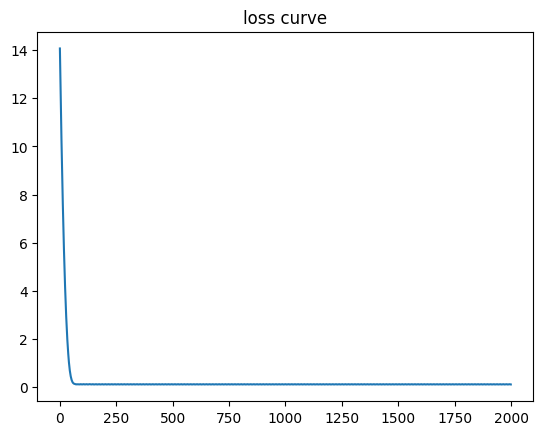

In [38]:
import matplotlib.pyplot as plt
loss_df = pd.DataFrame(model.history.history)
plt.title("loss curve")
plt.plot(loss_df)


In [39]:
X_n1=[[40]]
X_n1=Scaler.transform(X_n1)
model.predict(X_n1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[399.2835]], dtype=float32)